L'dée de ce notebook est de pouvoir tracer les étapes de réalisation d'un calcul de temps de parcours de référence. Chap 1 : Import des données

TO DO  :
actuellement je limite lles données aux temps de parcours inférieur 90 percentile. le mieux serait de pouvoir limiter à des intervalles  : inferieur au 90 eme percentile et sup à X heures pour ceux qui ont dormi entre temp

In [434]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


On travaille d'abord sur le brut sur une journee

In [446]:
df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')#telecharger une partie des donnees sur unejournee

In [447]:
info_df_journee=t.df_source(df_journee)

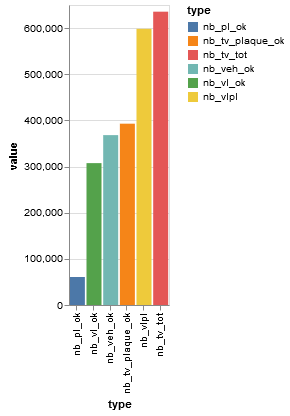

In [448]:
#graphes
graph_stat, graph_fiab=info_df_journee.plot_graphs()
#stats sur la journée
graph_stat

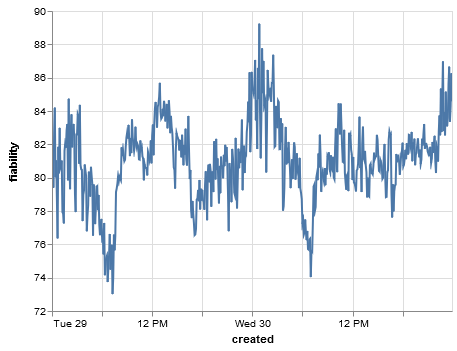

In [449]:
#fiabilité moyenne par tranche de 5 min (graph interactif)
graph_fiab

exemple de caractérisation de df 
Pour refair la caractérisation d'une df faire appel à la classe carac_df

In [413]:
#test sur un temps de parcours ente 2 cameras

In [450]:
stat8h_9h_cam19_cam4=t.df_tps_parcours(df_journee,'2019-01-29 08:00:00', 60, 16, 19,4) #création de la classe qui contient les df intermediaires

In [451]:
graph_stat_trie, graph_brut=stat8h_9h_cam19_cam4.plot_graphs()

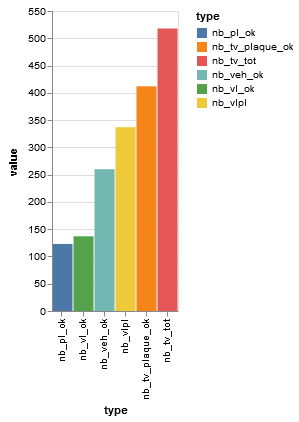

In [452]:
graph_stat_trie

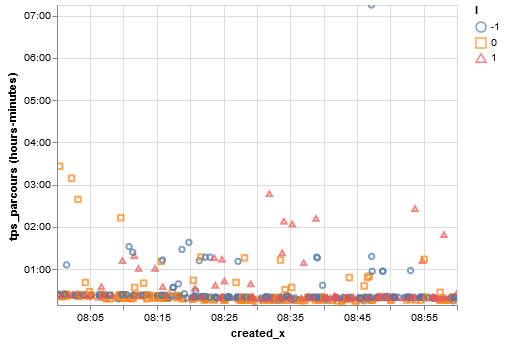

In [453]:
graph_brut

chap 2 : 
Trouver les vehicules en transit entre un point entrant et un point sortant

In [454]:
# rechercher le temps de parcours mini et max d'un pl passé entre 8h et 9h entre camera 19 et 4
timedelta_min=stat8h_9h_cam19_cam4.df_tps_parcours_pl_final.tps_parcours.min()

In [455]:
timedelta_max=stat8h_9h_cam19_cam4.df_tps_parcours_pl_final.tps_parcours.max()

In [494]:
stat8h_9h_cam19_cam4.date_debut

'2019-01-29 08:00:00'

In [493]:
# on en déduit les timestamp debut et fin derecherche de ces pl entre les camera 4 et 7
timestamp_mini=stat8h_9h_cam19_cam4.date_debut+timedelta_min
timestamp_maxi=pd.to_datetime('2019-01-29 08:59:59')+timedelta_max
duree=(((timestamp_maxi-timestamp_mini).seconds)//60)+1 #partie entere de la division plus 1 minutes

TypeError: can only concatenate str (not "Timedelta") to str

In [461]:
#rechercher le df des cameras 4 et 7, à parir de du précedent + tempsde parcours mini

In [489]:
df_8h_9h_cam4_cam5=t.df_tps_parcours(df_journee,timestamp_mini,duree,14,4,5)#param date debut et start selon les valeurs ci-dessus

In [490]:
# preparer le jointure entre es tables de tps de parcours
#dico de renommage des colonnes
dico_rename_entree={'created_x':'date_cam_1','created_y':'date_cam_2','camera_id_x':'cam_1','camera_id_y':'cam_2' }
pl_8h9h_cam19_4=stat8h_9h_cam19_cam4.df_tps_parcours_pl_final.rename(columns=dico_rename_entree).drop(['fiability_x', 'fiability_y','l_x','l_y', 'state_x', 'state_y'],axis=1).copy()
pl_8h9h_cam4_5=df_8h_9h_cam4_cam5.df_tps_parcours_pl_final.rename(columns=dico_rename_entree).drop(['fiability_x', 'fiability_y','l_x','l_y', 'state_x', 'state_y'],axis=1).copy()

In [491]:
transit_8h9h_cam19_7=pd.merge(pl_8h9h_cam19_4,pl_8h9h_cam4_5,on='immat')

In [492]:
transit_8h9h_cam19_7

,date_cam_2_x,date_cam_1_x,cam_1_x,immat,cam_2_x,l_x,fiability_x,tps_parcours_x,date_cam_2_y,date_cam_1_y,cam_1_y,cam_2_y,l_y,fiability_y,tps_parcours_y
0,2019-01-29 08:25:34,2019-01-29 08:00:56,19,bf9dfd50a4a693085e3080156f11c25314f96f03,4,1,True,00:24:38,2019-01-29 08:37:18,2019-01-29 08:25:34,4,5,1,True,00:11:44
1,2019-01-29 08:25:49,2019-01-29 08:01:07,19,cf4f7ddbb3a6d9006e029777df712a53c2d76992,4,1,True,00:24:42,2019-01-29 08:37:04,2019-01-29 08:25:49,4,5,1,True,00:11:15
2,2019-01-29 08:26:02,2019-01-29 08:01:16,19,183bc8585ac5a2e26b6d2ada6ce6891235a36b92,4,1,True,00:24:46,2019-01-29 08:37:20,2019-01-29 08:26:02,4,5,1,True,00:11:18
3,2019-01-29 08:26:14,2019-01-29 08:02:34,19,dcf2ffa7638b1ae7d0281cbb94d4c7cf0a0912f7,4,1,True,00:23:40,2019-01-29 08:37:42,2019-01-29 08:26:14,4,5,1,True,00:11:28
4,2019-01-29 08:26:31,2019-01-29 08:02:19,19,54581cfa0b0f0c1dbe24fd60ca7efcc07439232f,4,1,True,00:24:12,2019-01-29 08:38:07,2019-01-29 08:26:31,4,5,1,True,00:11:36
5,2019-01-29 08:27:12,2019-01-29 08:03:06,19,31c6bdae383e5c4f25e803d55dc539d6c40e6105,4,1,True,00:24:06,2019-01-29 08:38:16,2019-01-29 08:27:12,4,5,1,True,00:11:04
6,2019-01-29 08:27:42,2019-01-29 08:03:55,19,77728d75d8ee8a1e27c95ca4077faddbf9dcdd93,4,1,True,00:23:47,2019-01-29 08:38:48,2019-01-29 08:27:42,4,5,1,True,00:11:06
7,2019-01-29 08:28:28,2019-01-29 08:04:14,19,59148b1dc67f7b2ca10635cd4fabe903b1fd0b63,4,1,True,00:24:14,2019-01-29 08:39:21,2019-01-29 08:28:28,4,5,1,True,00:10:53
8,2019-01-29 08:28:53,2019-01-29 08:05:07,19,3de49b107ce9b3f1add8f9314add9f5a2cadbe50,4,1,True,00:23:46,2019-01-29 08:39:49,2019-01-29 08:28:53,4,5,1,True,00:10:56
9,2019-01-29 08:31:16,2019-01-29 08:07:23,19,2a88c4e3e59236321a2098ccc9dd4b47f2eed478,4,1,True,00:23:53,2019-01-29 08:42:27,2019-01-29 08:31:16,4,5,1,True,00:11:11
